<a href="https://colab.research.google.com/github/danyamrajuSanjay/Machine_Learning/blob/master/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)
import numpy as np
np.set_printoptions(linewidth=200)
import matplotlib.pyplot as plt


2.3.0


In [2]:
mnist=keras.datasets.fashion_mnist
(train,train_labels),(test,test_labels)=mnist.load_data()

Each image is 28 X 28 pixel. The training data has 60k such images and 10K images to check model *performance*

In [3]:
train.shape

(60000, 28, 28)

**Visulaize one training example**

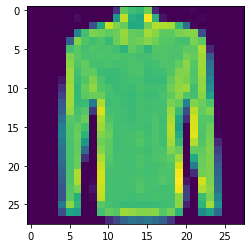

In [4]:
plt.imshow(train[40])

***Normalize data to help the model perform better. Normalizing helps gradient descent algo to perform faster as the convergence is minimal. #The pixel values will be from 0 to 1 post this step***

In [5]:
train =train/255
test=test/255
train[20][1]

array([0.        , 0.        , 0.        , 0.        , 0.        , 0.00392157, 0.        , 0.06666667, 0.74509804, 0.80784314, 0.79215686, 0.56862745, 0.58039216, 0.57254902, 0.58039216, 0.65098039,
       0.64705882, 0.74117647, 0.83137255, 0.82352941, 0.79215686, 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        ])

In [6]:
model= keras.Sequential()
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128,activation=tf.nn.relu))
model.add(keras.layers.Dense(10,activation=tf.nn.softmax))

In [7]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [8]:
model.fit(train,train_labels,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4978 - accuracy: 0.8250
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3727 - accuracy: 0.8647
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3367 - accuracy: 0.8778
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3128 - accuracy: 0.8845
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2949 - accuracy: 0.8910
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2797 - accuracy: 0.8973
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2673 - accuracy: 0.9008
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2568 - accuracy: 0.9046
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2460 - accuracy: 0.9079
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.239

In [9]:
model.evaluate(test,test_labels)

313/313 [==============================] - 0s 1ms/step - loss: 0.3331 - accuracy: 0.8850


[0.33309078216552734, 0.8849999904632568]

[1.92937968e-08 5.12638265e-11 4.04786066e-11 1.18852022e-08 1.09061782e-09 1.12568276e-04 8.78326532e-08 1.36047294e-02 2.71970411e-08 9.86282647e-01]
9


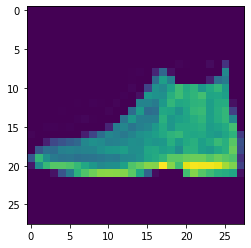

In [10]:
prediction=model.predict(test)
print(prediction[0])
print(test_labels[0])
plt.imshow(test[0])

**increasing neurons in dense**

In [11]:
model=keras.Sequential([keras.layers.Flatten(),
                        keras.layers.Dense(1024,activation=tf.nn.relu),
                        keras.layers.Dense(10,activation=tf.nn.softmax)])
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.fit(train,train_labels,epochs=10)


Epoch 1/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.4660 - accuracy: 0.8337
Epoch 2/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.3548 - accuracy: 0.8700
Epoch 3/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.3215 - accuracy: 0.8819
Epoch 4/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2949 - accuracy: 0.8898
Epoch 5/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2795 - accuracy: 0.8963
Epoch 6/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2618 - accuracy: 0.9027
Epoch 7/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2485 - accuracy: 0.9073
Epoch 8/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2409 - accuracy: 0.9093
Epoch 9/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2296 - accuracy: 0.9137
Epoch 10/10
1875/1875 [==============================] - 13s 7ms/step - l

In [12]:
print(model.evaluate(test,test_labels))
pred=model.predict(test)
print(pred[0])

313/313 [==============================] - 1s 3ms/step - loss: 0.3385 - accuracy: 0.8830
[0.33847808837890625, 0.8830000162124634]
[3.9840905e-11 3.6409738e-12 5.4222937e-12 6.5223117e-15 5.0875111e-12 2.6193814e-04 6.1650473e-14 1.0834185e-02 4.5311636e-11 9.8890394e-01]


### Removing flatten layer will thrown an error

In [16]:
# model=keras.Sequential([#keras.layers.Flatten(),
#                         keras.layers.Dense(64,activation=tf.nn.relu),
#                         keras.layers.Dense(10,activation=tf.nn.softmax)])
# model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
# model.fit(train,train_labels,epochs=5)


### Changing output layer from 10 neurons to 5 will also thrown an error

In [15]:
# model=keras.Sequential([keras.layers.Flatten(),
#                         keras.layers.Dense(64,activation=tf.nn.relu),
#                         keras.layers.Dense(5,activation=tf.nn.softmax)])
# model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
# model.fit(train,train_labels,epochs=5)


#without normalizing

In [18]:
import tensorflow as tf
print(tf.__version__)
mnist = tf.keras.datasets.mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
# training_images=training_images/255.0
# test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=5)
model.evaluate(test_images, test_labels)
classifications = model.predict(test_images)
print(classifications[0])
print(test_labels[0])

2.3.0
Epoch 1/5
1875/1875 [==============================] - 7s 4ms/step - loss: 2.6149 - accuracy: 0.9046
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3405 - accuracy: 0.9374
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2967 - accuracy: 0.9422
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2765 - accuracy: 0.9460
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.2610 - accuracy: 0.9450
[0.0000000e+00 4.1276623e-19 2.2563003e-19 8.7763963e-11 1.5552301e-23 2.2655928e-31 0.0000000e+00 1.0000000e+00 4.2268523e-27 3.5812673e-19]
7


## with normalizing 

In [19]:
import tensorflow as tf
print(tf.__version__)
mnist = tf.keras.datasets.mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images/255.0
test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=5)
model.evaluate(test_images, test_labels)
classifications = model.predict(test_images)
print(classifications[0])
print(test_labels[0])

2.3.0
Epoch 1/5
1875/1875 [==============================] - 12s 7ms/step - loss: 0.1998 - accuracy: 0.9414
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0807 - accuracy: 0.9755
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0529 - accuracy: 0.9836
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0364 - accuracy: 0.9886
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.0778 - accuracy: 0.9762
[1.0641846e-08 3.1036315e-08 7.0495289e-06 8.0445483e-05 9.4134050e-12 1.6839975e-08 3.3455044e-12 9.9991131e-01 2.9308063e-09 1.2219045e-06]
7


## Callbacks to stop traning the model once model performances reaches the desired accuracy


In [23]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('loss')<0.4):
      print("\nReached 60% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()

In [24]:
model=keras.Sequential()
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(512,activation=tf.nn.relu))
model.add(keras.layers.Dense(10,activation=tf.nn.softmax))
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.fit(train,train_labels,epochs=5,callbacks=[callbacks])
model.evaluate(test,test_labels)

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4756 - accuracy: 0.8300
Epoch 2/5
1871/1875 [============================>.] - ETA: 0s - loss: 0.3581 - accuracy: 0.8690
Reached 60% accuracy so cancelling training!
313/313 [==============================] - 1s 2ms/step - loss: 10.9940 - accuracy: 0.0971


[10.993962287902832, 0.09709999710321426]